In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [17]:
retail_books = pd.read_csv('../Data/retail_RFM_scores.csv')   

In [18]:
retail_books.head()

,CustomerID,Recency,Frequency,Monetary,M_Score,F_Score,R_Score
0,1001,8.0,3,135.62,2,4,5
1,1002,154.0,1,108.84,2,1,2
2,1003,16.0,1,66.58,1,1,5
3,1005,103.0,2,107.57,2,4,2
4,1009,40.0,2,202.30,4,4,4


In [19]:
rb = retail_books[['R_Score', 'F_Score', 'M_Score']] 

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rb_scaled = scaler.fit_transform(rb)

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

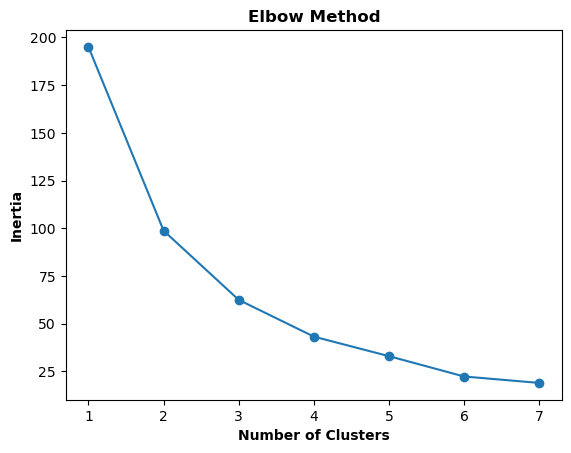

In [26]:
inertia = []

for k in range(1, 8):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(rb_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 8), inertia, marker='o')
plt.title("Elbow Method", fontweight="bold")
plt.xlabel("Number of Clusters", fontweight="bold")
plt.ylabel("Inertia", fontweight="bold")
plt.show()


In [27]:
kmeans = KMeans(n_clusters=4, random_state=42)
retail_books["Cluster"] = kmeans.fit_predict(rb_scaled)

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [28]:
retail_books.head()

,CustomerID,Recency,Frequency,Monetary,M_Score,F_Score,R_Score,Cluster
0,1001,8.0,3,135.62,2,4,5,0
1,1002,154.0,1,108.84,2,1,2,1
2,1003,16.0,1,66.58,1,1,5,2
3,1005,103.0,2,107.57,2,4,2,3
4,1009,40.0,2,202.30,4,4,4,0


Text(0.5, 1.0, 'Customer Distribution Across Clusters')

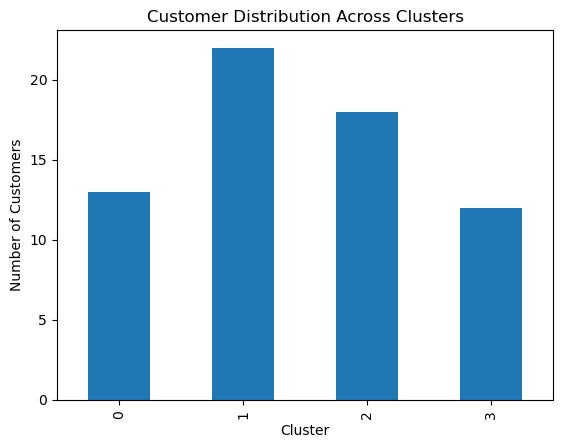

In [29]:
clust_count = retail_books['Cluster'].value_counts().sort_index()
clust_count.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution Across Clusters')

In [30]:
retail_books.groupby("Cluster").agg({
    "R_Score": ["min", "max","mean"],
    "F_Score": ["min", "max","mean"],
    "M_Score": ["min", "max","mean"]
})

R_Score               F_Score               M_Score              
            min max      mean     min max      mean     min max      mean
Cluster                                                                  
0             4   5  4.615385       4   5  4.153846       2   5  3.692308
1             2   3  2.136364       1   1  1.000000       1   4  1.727273
2             4   5  4.555556       1   4  1.333333       1   3  1.277778
3             2   3  2.416667       4   4  4.000000       2   4  3.500000

In [31]:
clust_labels = {0: 'Best Customers',
1: 'Loyal Customers',
2: 'At Risk Customers',
3: 'Lost Customers'}

In [32]:
retail_books["Cluster_Label"] = retail_books["Cluster"].map(clust_labels)

In [33]:
retail_books.head()

,CustomerID,Recency,Frequency,Monetary,M_Score,F_Score,R_Score,Cluster,Cluster_Label
0,1001,8.0,3,135.62,2,4,5,0,Best Customers
1,1002,154.0,1,108.84,2,1,2,1,Loyal Customers
2,1003,16.0,1,66.58,1,1,5,2,At Risk Customers
3,1005,103.0,2,107.57,2,4,2,3,Lost Customers
4,1009,40.0,2,202.30,4,4,4,0,Best Customers


In [34]:
retail_books.to_csv('../Data/retail_RFM_KMeans.csv', index=False)